La ecuación que muestra la dinamica de una particula en presencia de una compo electrico y magnetico esta dado por la expresion de la fuerza de lorentz, para este trabajo se utiliza que el campo E es cero por efectos practicos, ademas se supone que la particula es relativista, por otro lado el campo magenetico en el cual esta sumergido la particula, es un dipolo magnetico perfecto a distancias de 2 radios terrestres en adelante cuya momneto magnetico esta situado en direccion negativa de k(vector unitario)

In [35]:
from matplotlib import pyplot as plt
from numpy import sqrt, array, pi, linspace
from math import sin, cos
from scipy.integrate import odeint
from mpl_toolkits import mplot3d

In [134]:
# funcion de la ecuacion dinamica
# dado que se utiliza un metodo numerico para la solucion, se necesita bajar el orden de la derivada, por lo tanto,
# existe una mayor cantida de ecuaciones a solucionar
# el sistema esta dado por "dv/dt = d2r/dt2" y dr/dt = v
# para un espacio 3D se tiene 6 ecuaciones

def f(Cond_ini, t, q, m, c, Re, Bo):
    
    rm = sqrt(Cond_ini[0]**2+Cond_ini[1]**2+Cond_ini[2]**2) # magnitud de r
    vm = sqrt(Cond_ini[3]**2+Cond_ini[4]**2+Cond_ini[5]**2) # magnitud de v
    
    v = [Cond_ini[3], Cond_ini[4], Cond_ini[5]] # forma vectorial de v
    
    a = -(Bo*(Re**3))/(rm**5) # constante de repeticion
    gamma = 1/sqrt(1-(vm/c)**2) # factor gamma
    b = q/(gamma*m) # constante de repeticion
    
    r = [Cond_ini[0], Cond_ini[1], Cond_ini[2]]# vector posicion
    Bdip = [a*3*r[0]*r[2], a*3*r[1]*r[2], a*(2*r[2]**2-r[0]**2-r[1]**2)]# vector  dipolo B
     
    dx = v[0]
    dvx = b*(v[1]*Bdip[2]-v[2]*Bdip[1])
    dy = v[1]
    dvy = -b*(v[0]*Bdip[2]-v[2]*Bdip[0])
    dz = v[2]
    dvz = b*(v[0]*Bdip[1]-v[1]*Bdip[0])
    return array([dx, dy, dz, dvx, dvy, dvz])

In [155]:
# condiiones iniciales
# Et**2 = mo*c**2 +(pc)**2
# p = \gamma *m*v

Re = 6378137 #mts
Bo = 3.07e-5 # Tesla
Ek = 10 #Mev Energía cinetica
q = 1.6e-19 # coulomb
c = 3e8 # m/s
mp = 938.272013/(c**2) #MeV
Eo = mp*c**2
#v = c/sqrt(1+(Eo/Ek))
v = 0.14486*c # velocidad de la parcticula 
#v = c/sqrt( 1 + (c**2)/( (Ek**2+2*Ek*Eo)/(mp*(Eo)) ))

m =  1.672621777e-27 # Proton mass (kg)
Alpha = 30*(pi/180)# angulo en la cual la particula se sumerge en el campo(dipolo)
# velocida de la particula forma vectorial
vox = 0
voy = v*sin(Alpha)
voz = v*cos(Alpha)

vo = [vox, voy, voz]

tf = 60 # tiempo final
N = 10000 
t = linspace(0, tf, N)

In [156]:
conds_iniciales = [2*Re, 0, 0, vox, voy, voz]
# solucion particula 1
solucion = odeint(f, conds_iniciales, t, args=(q, m, c, Re, Bo), atol = 1e-9, rtol = 1e-9)

In [157]:
conds_iniciales = [4*Re, 0, 0, vox, voy, voz]
# solucion particula 2
solucion2 = odeint(f, conds_iniciales, t, args=(q, m, c, Re, Bo),atol = 1e-9, rtol = 1e-9)

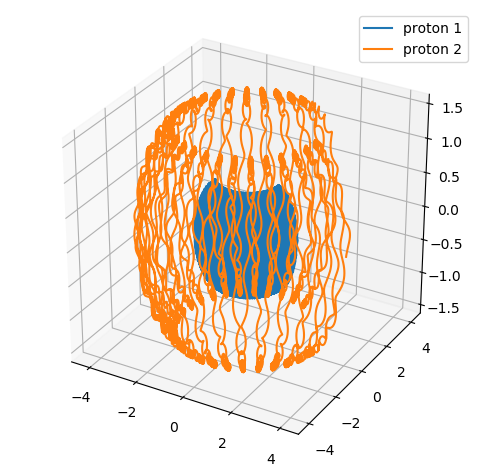

In [158]:
%matplotlib inline
fig = plt.figure(num = 1, figsize=(6,6), dpi=100)
ax = plt.axes(projection = '3d')
ax.plot3D(solucion[:,0]/Re,solucion[:,1]/Re,solucion[:,2]/Re, label = 'proton 1')
ax.plot3D(solucion2[:,0]/Re,solucion2[:,1]/Re,solucion2[:,2]/Re, label = 'proton 2')
ax.legend()
#ax.xlabel('x[Re]')
#ax.ylabel('y[Re]')
#ax.zlabel('z[Re]')

Text(0, 0.5, 'y[Re]')

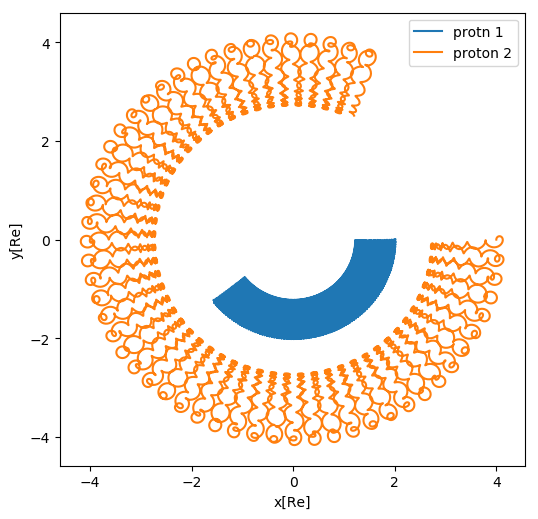

In [159]:
fig = plt.figure(num = 1, figsize=(6,6), dpi=100)
plt.plot(solucion[:,0]/Re,solucion[:,1]/Re,label = 'protn 1')
plt.plot(solucion2[:,0]/Re,solucion2[:,1]/Re, label = 'proton 2')
plt.legend()
plt.xlabel('x[Re]')
plt.ylabel('y[Re]')

Los ejes de cada grafica estan normalizados utilizando el Radio terrestre Re; cuando la particula se sumerge en el campo
del dipolo magnetico presenta una desviacion de su movimiento preservando su velocidad, dado que el campo magnetico no ejerce trabajo sobre la particula 

In [207]:
v = 0.9*c # velocidad de la parcticula para 10GeV de energia cinetica
Alpha = 0*(pi/180)# angulo en la cual la particula se sumerge en el campo(dipolo)

vox = v*cos(Alpha)
voy = 0#v*sin(Alpha)
voz = 0#v*cos(Alpha)

vo = [vox, voy, voz]

tf = 60 # tiempo final
N = 50000 
t = linspace(0, tf, N)
conds_iniciales = [2*Re, 0, 0, vox, voy, voz]
# solucion particula 1
solucion = odeint(f, conds_iniciales, t, args=(q, m, c, Re, Bo), atol = 1e-9, rtol = 1e-9)

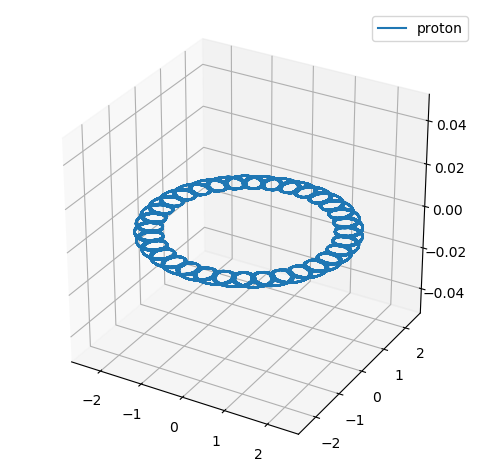

In [208]:
%matplotlib inline
fig = plt.figure(num = 1, figsize=(6,6), dpi=100)
ax = plt.axes(projection = '3d')
ax.plot3D(solucion[:,0]/Re,solucion[:,1]/Re,solucion[:,2]/Re, label = 'proton')
ax.legend()

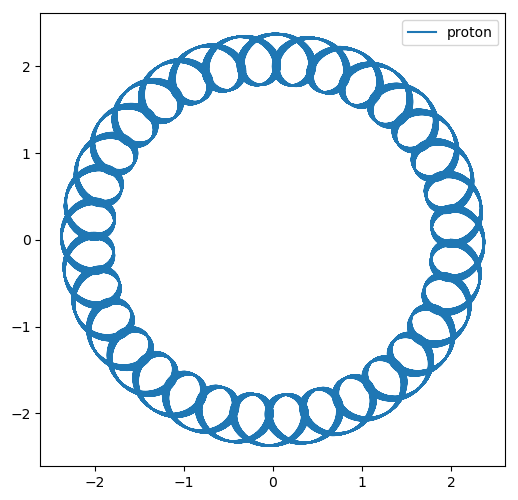

In [209]:
fig = plt.figure(num = 1, figsize=(6,6), dpi=100)
plt.plot(solucion[:,0]/Re,solucion[:,1]/Re,label = 'proton')
plt.legend()